In [34]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

## 1. Importamos el dataset guardado

In [35]:
with np.load('dataset.npz') as data:
    ecg = {key: data[key] for key in data.keys()}

datos = ecg['base']
print(datos)

[[499. 498. 497. ...   0.   0.   0.]
 [493. 490. 487. ...   0.   0.   0.]
 [479. 479. 474. ...   0.   0.   0.]
 ...
 [483. 486. 487. ...   0.   0.   0.]
 [248. 262. 280. ...   0.   0.   0.]
 [538. 536. 533. ...   0.   0.   0.]]


Text(0.5, 1.0, 'Ejemplo en agitación')

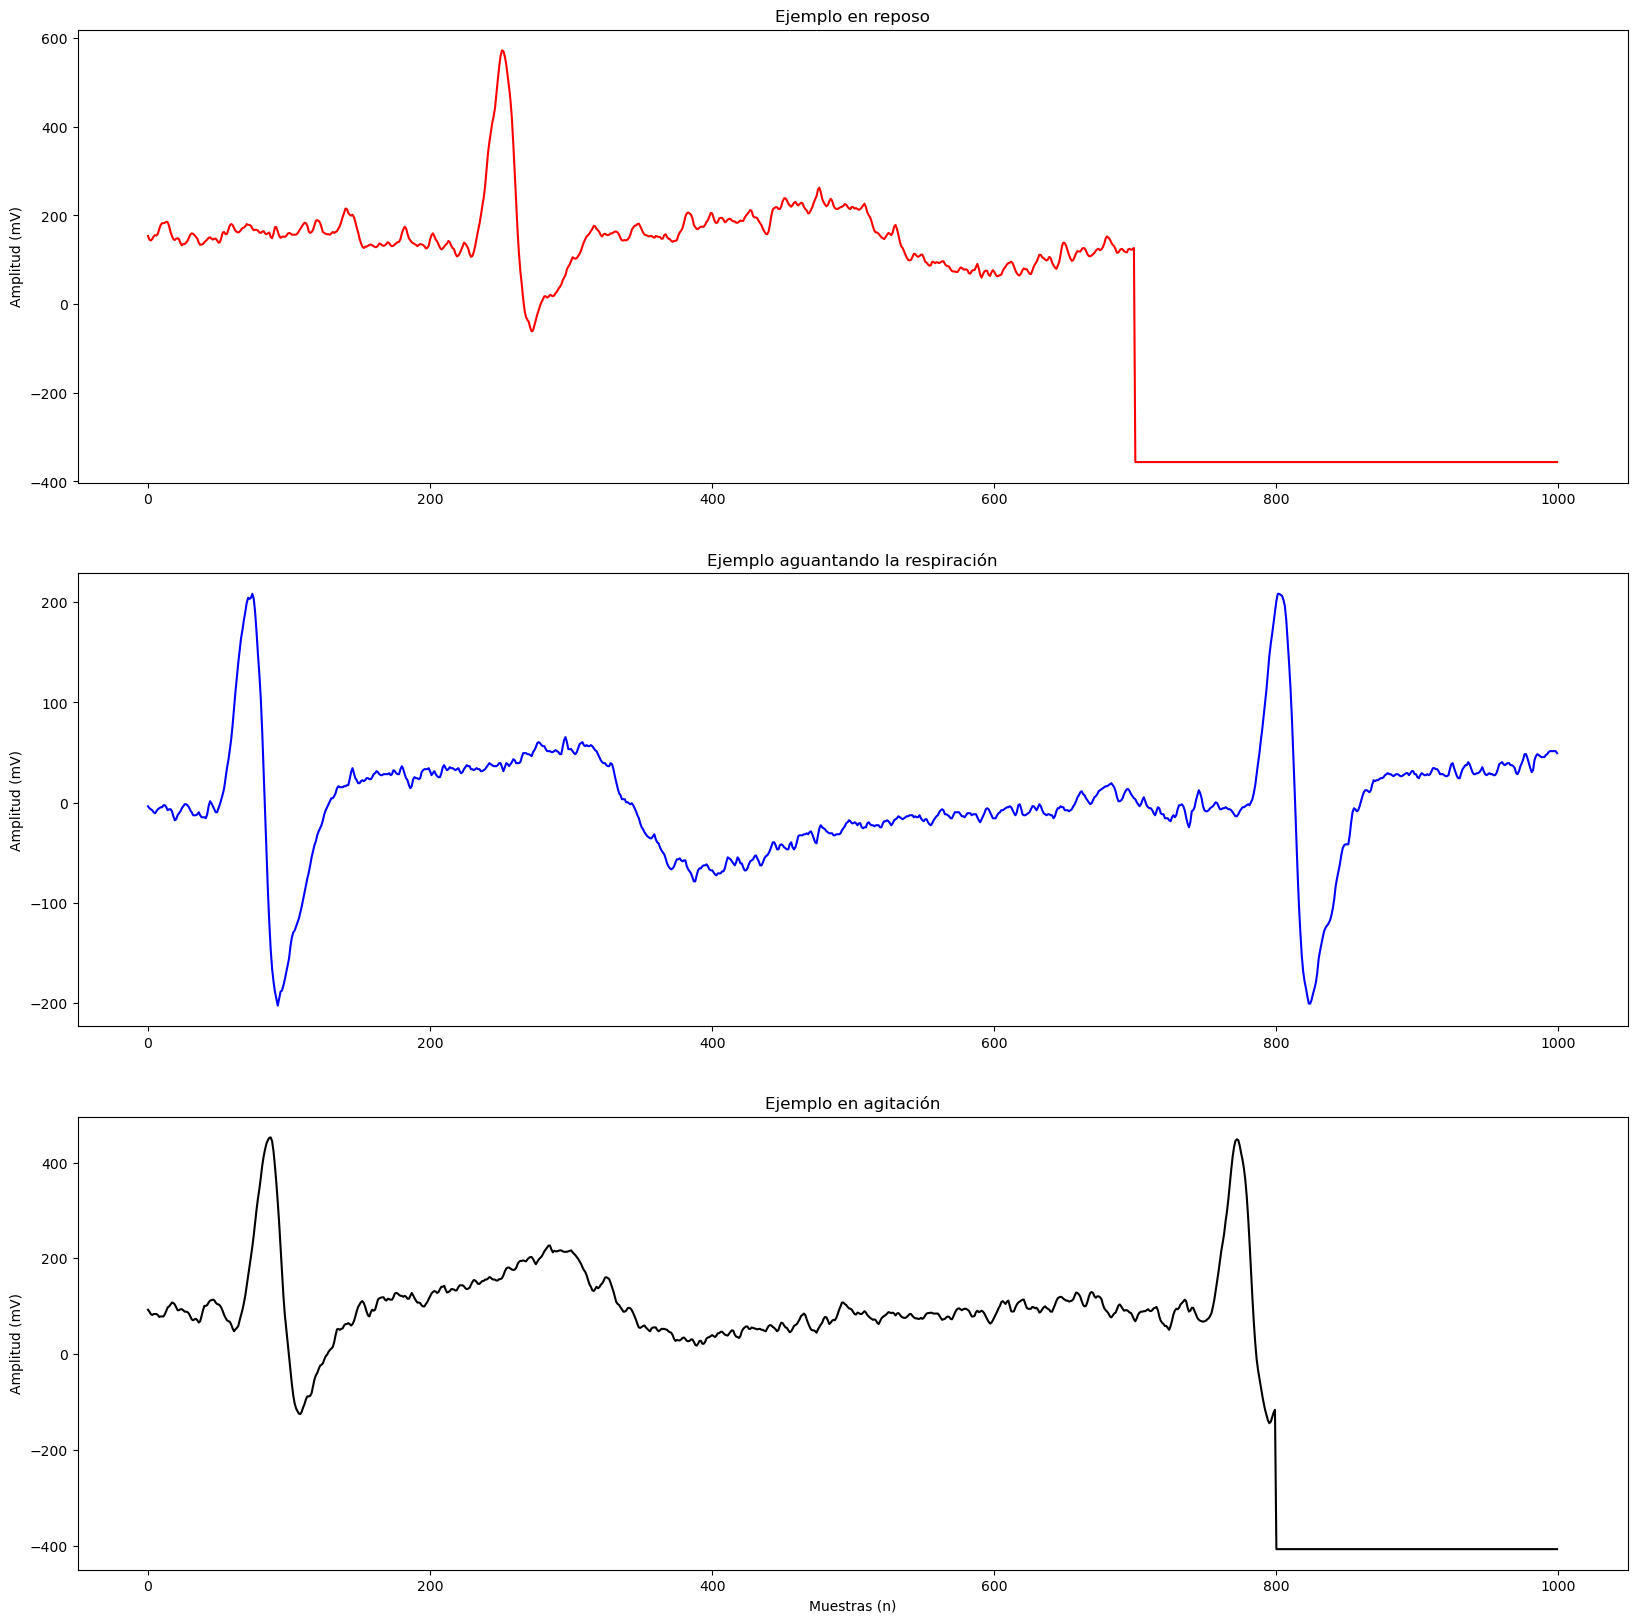

In [36]:
## Elegiremos tres señales de ejemplo de cada target 
'''
    Target:
    0:  Estado Basal    [0:48]
    1:  Estado Respiración [48:84]
    2:  Estado Ejercicio [84:129]
'''

ejem_basal = datos[10] #----> Dentro del rango del estado basal
ejem_resp = datos[60] #----> Dentro del rango del estado respiracion
ejem_ejer = datos[110]  #----> Dentro del rango del estado ejercicio

## Regulamos las amplitudes de las señales
data_basal = ejem_basal - np.mean(ejem_basal)
data_resp = ejem_resp - np.mean(ejem_resp)
data_ejer = ejem_ejer - np.mean(ejem_ejer)

n= np.arange(len(data_basal))

#plot

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(n, data_basal,'r'); plt.ylabel("Amplitud (mV)")
plt.title("Ejemplo en reposo")
plt.subplot(3, 1, 2);plt.plot(n, data_resp, 'b'); plt.ylabel("Amplitud (mV)")
plt.title("Ejemplo aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(n, data_ejer, 'k');  plt.ylabel("Amplitud (mV)"); plt.xlabel( 'Muestras (n)')
plt.title("Ejemplo en agitación")

## 2. Análisis en frecuencia de cada ejemplo 

Text(0.5, 1.0, 'Estado ejercicio')

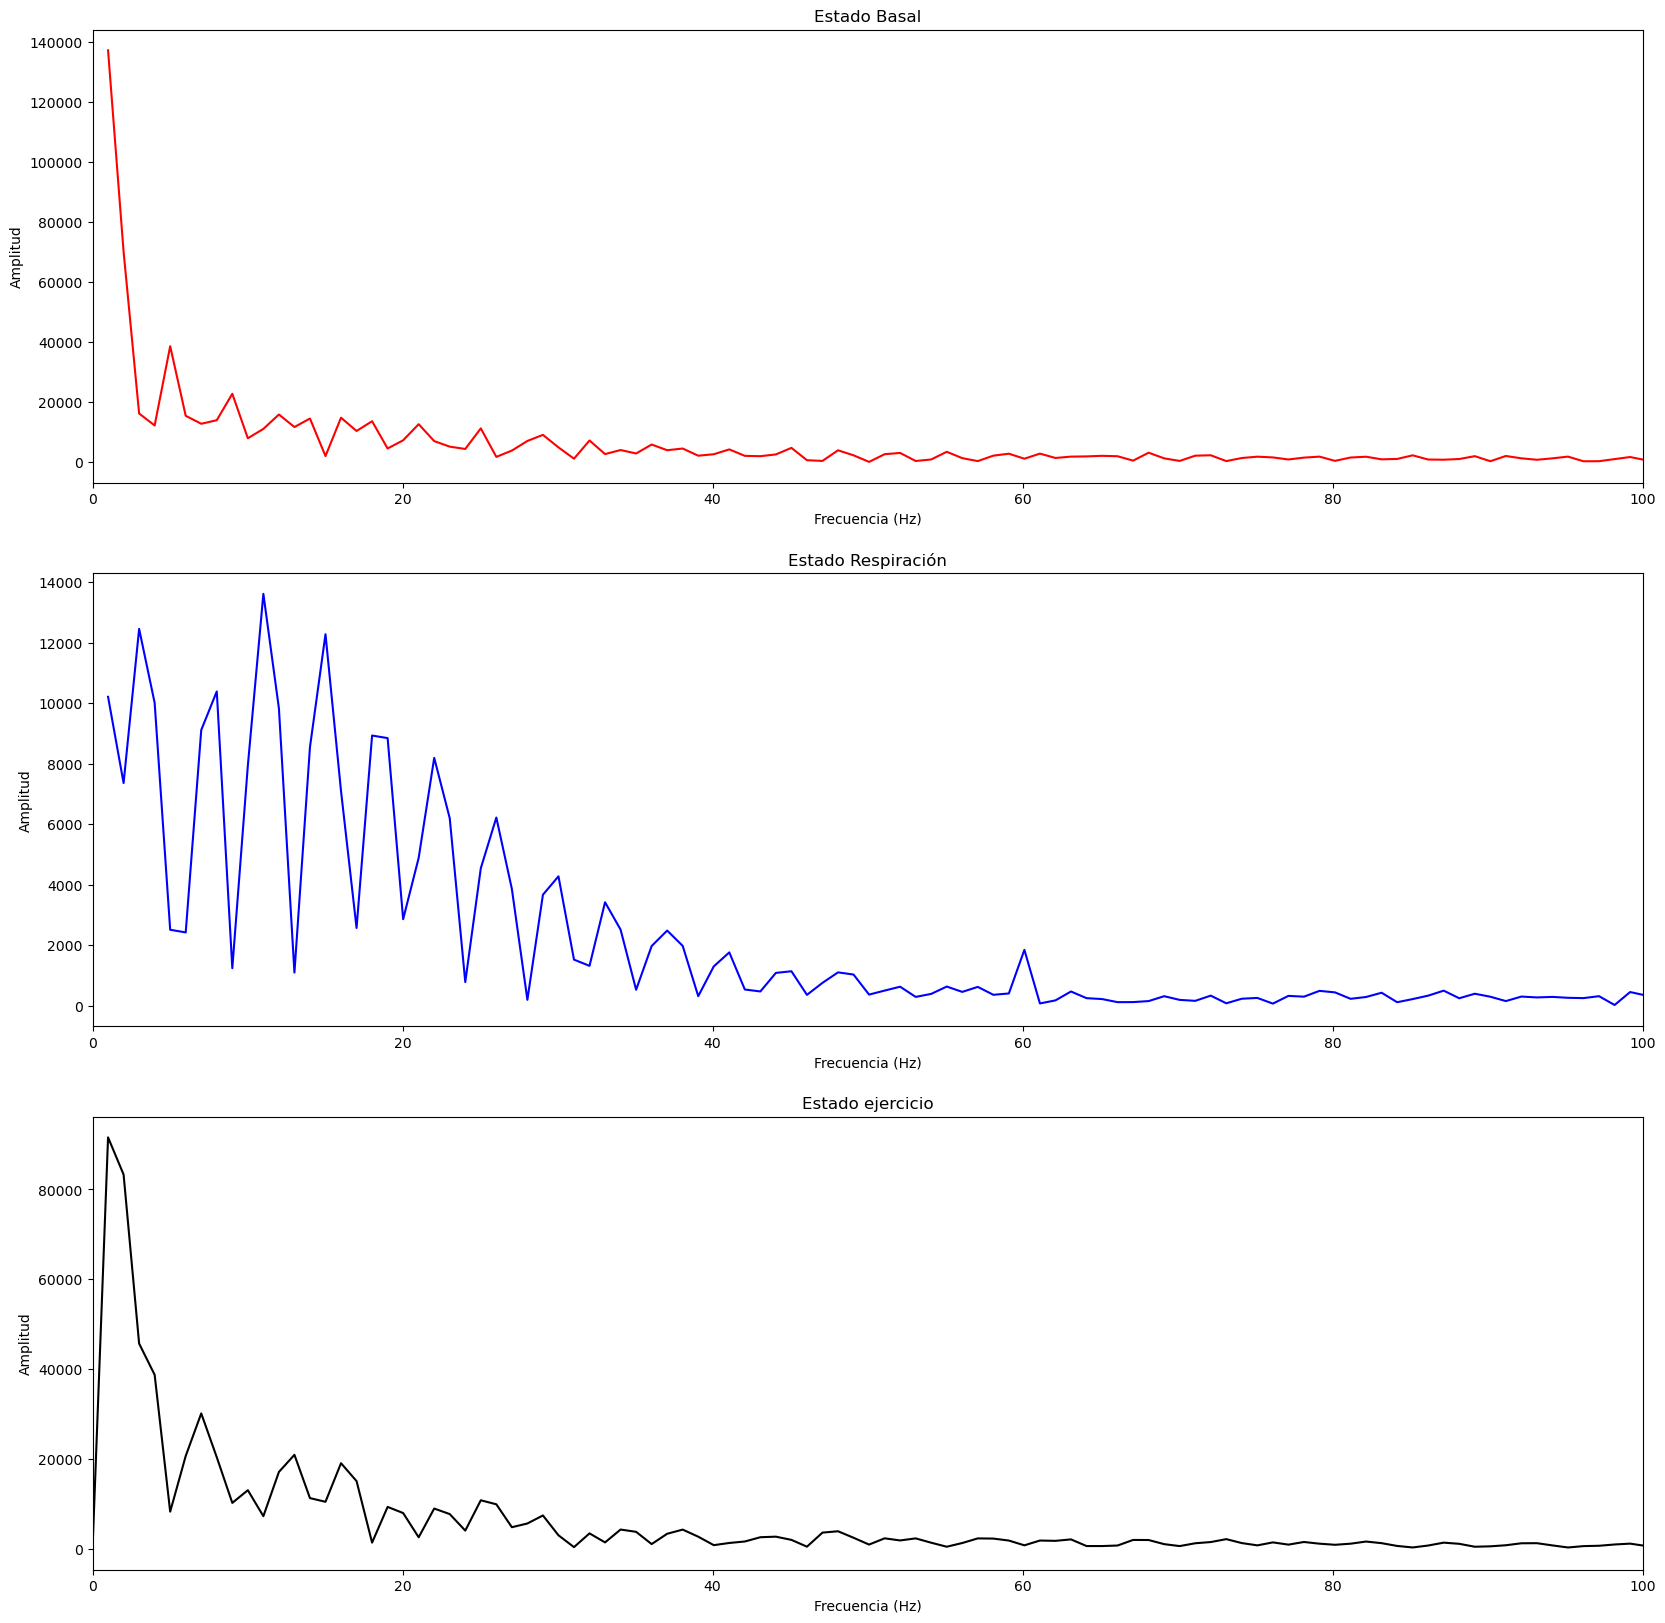

In [37]:
Fs=1000
N=len(n)

#Análisi de frecuencia de cada ejemplo
SAMP1 = np.fft.fft(data_basal)
SAMP1 = SAMP1 [0:N//2]

SAMP2 = np.fft.fft(data_resp)
SAMP2  = SAMP2 [0:N//2]

SAMP3 = np.fft.fft(data_ejer)
SAMP3  = SAMP3 [0:N//2]

#f = n*Fs/(N-1) - Fs/2
f= np.linspace(0,Fs/2,N//2)
#f = np.fft.fftshift(f)


#Plot
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(f[1:], np.abs(SAMP1)[1:],'r'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Estado Basal")
plt.subplot(3, 1, 2);plt.plot(f[1:], np.abs(SAMP2)[1:], 'b'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Estado Respiración")
plt.subplot(3, 1, 3);plt.plot(f, np.abs(SAMP3), 'k');plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Estado ejercicio")

## 3. Creación de Filtro - IIR: butterworth

Text(0, 0.5, 'Magnitud (db)')

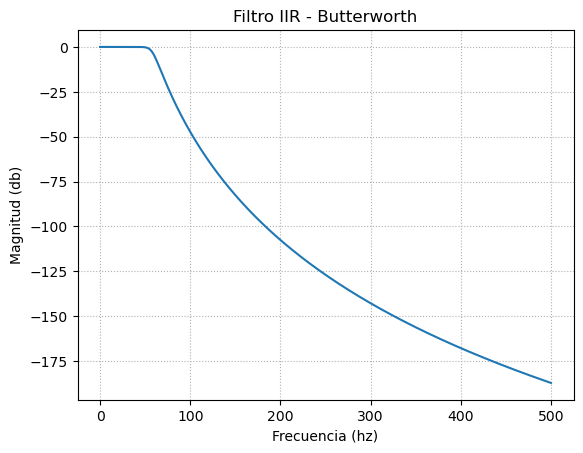

In [38]:
#Elegimos la frecuencia de corte (menor que 60 Hz --> frecuencia de corte)

Wc = 58*2*np.pi         #conversión a radianes
b,a = signal.butter(10, Wc, 'lowpass', True, 'ba')          #Coeficientes del filtro

Fmax=500

F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)

plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.title('Filtro IIR - Butterworth')
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

In [39]:
### ploteamos 


## 3.a Filtramos las señales con el filtro creado

Text(0.5, 1.0, 'Agitado')

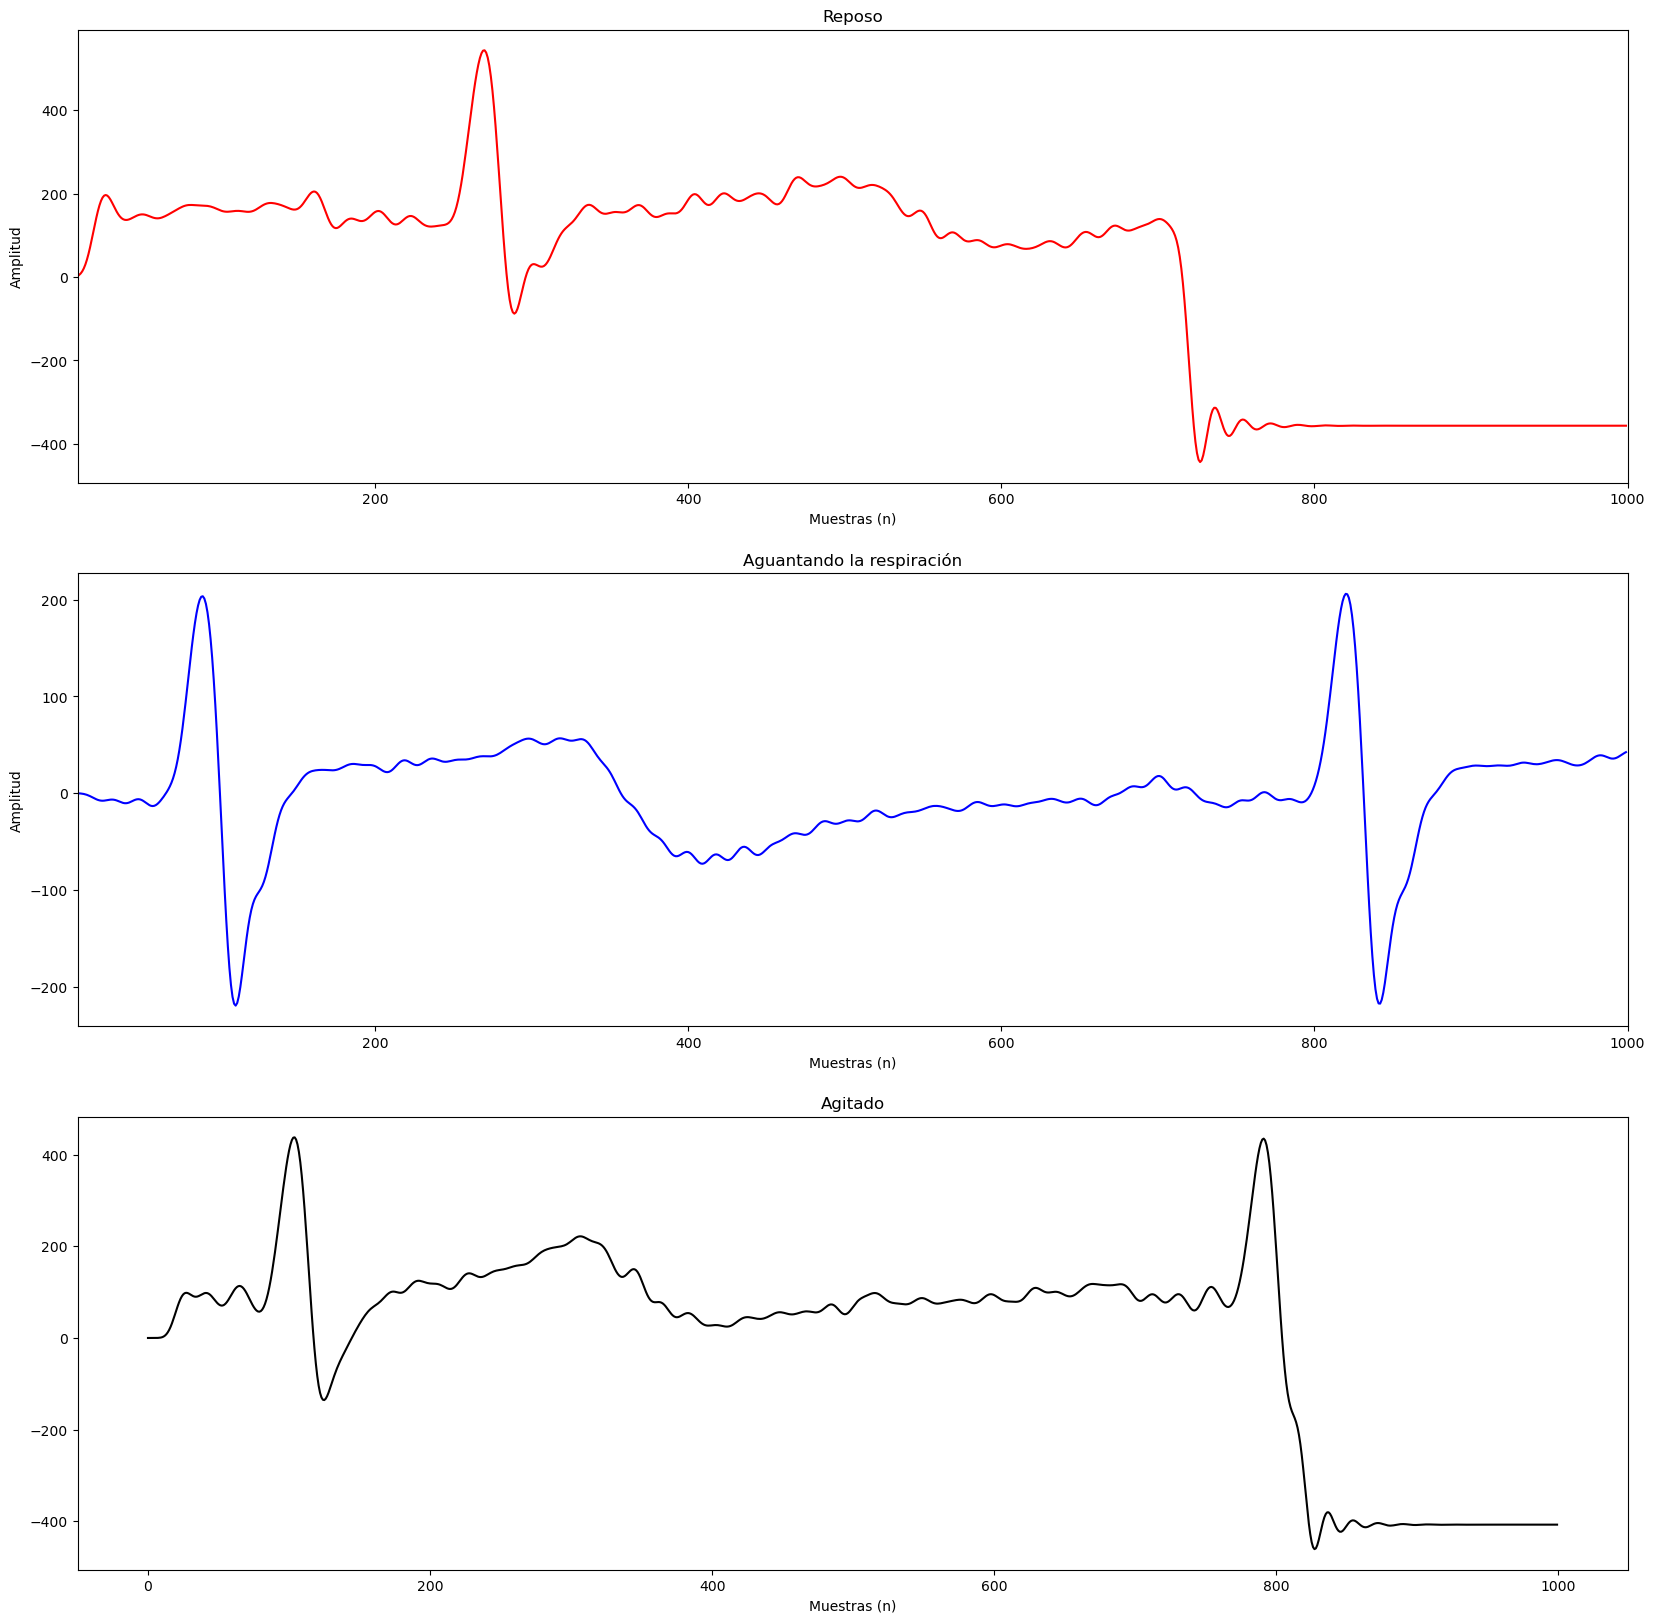

In [40]:
bd, ad = signal.bilinear(b,a,Fs)
data_basal_filt = signal.lfilter(bd,ad, data_basal) 
data_resp_filt = signal.lfilter(bd,ad, data_resp) 
data_ejer_filt = signal.lfilter(bd,ad, data_ejer)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(data_basal_filt,'r'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud");plt.xlim(10,1000)
plt.title("Reposo")
plt.subplot(3, 1, 2);plt.plot(data_resp_filt, 'b'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud");plt.xlim(10,1000)
plt.title("Aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(data_ejer_filt, 'k'); plt.xlabel( 'Muestras (n)')
plt.title("Agitado")

### Análisis de frecuencia de las señales filtradas(verificación)

Text(0.5, 1.0, 'Agitado')

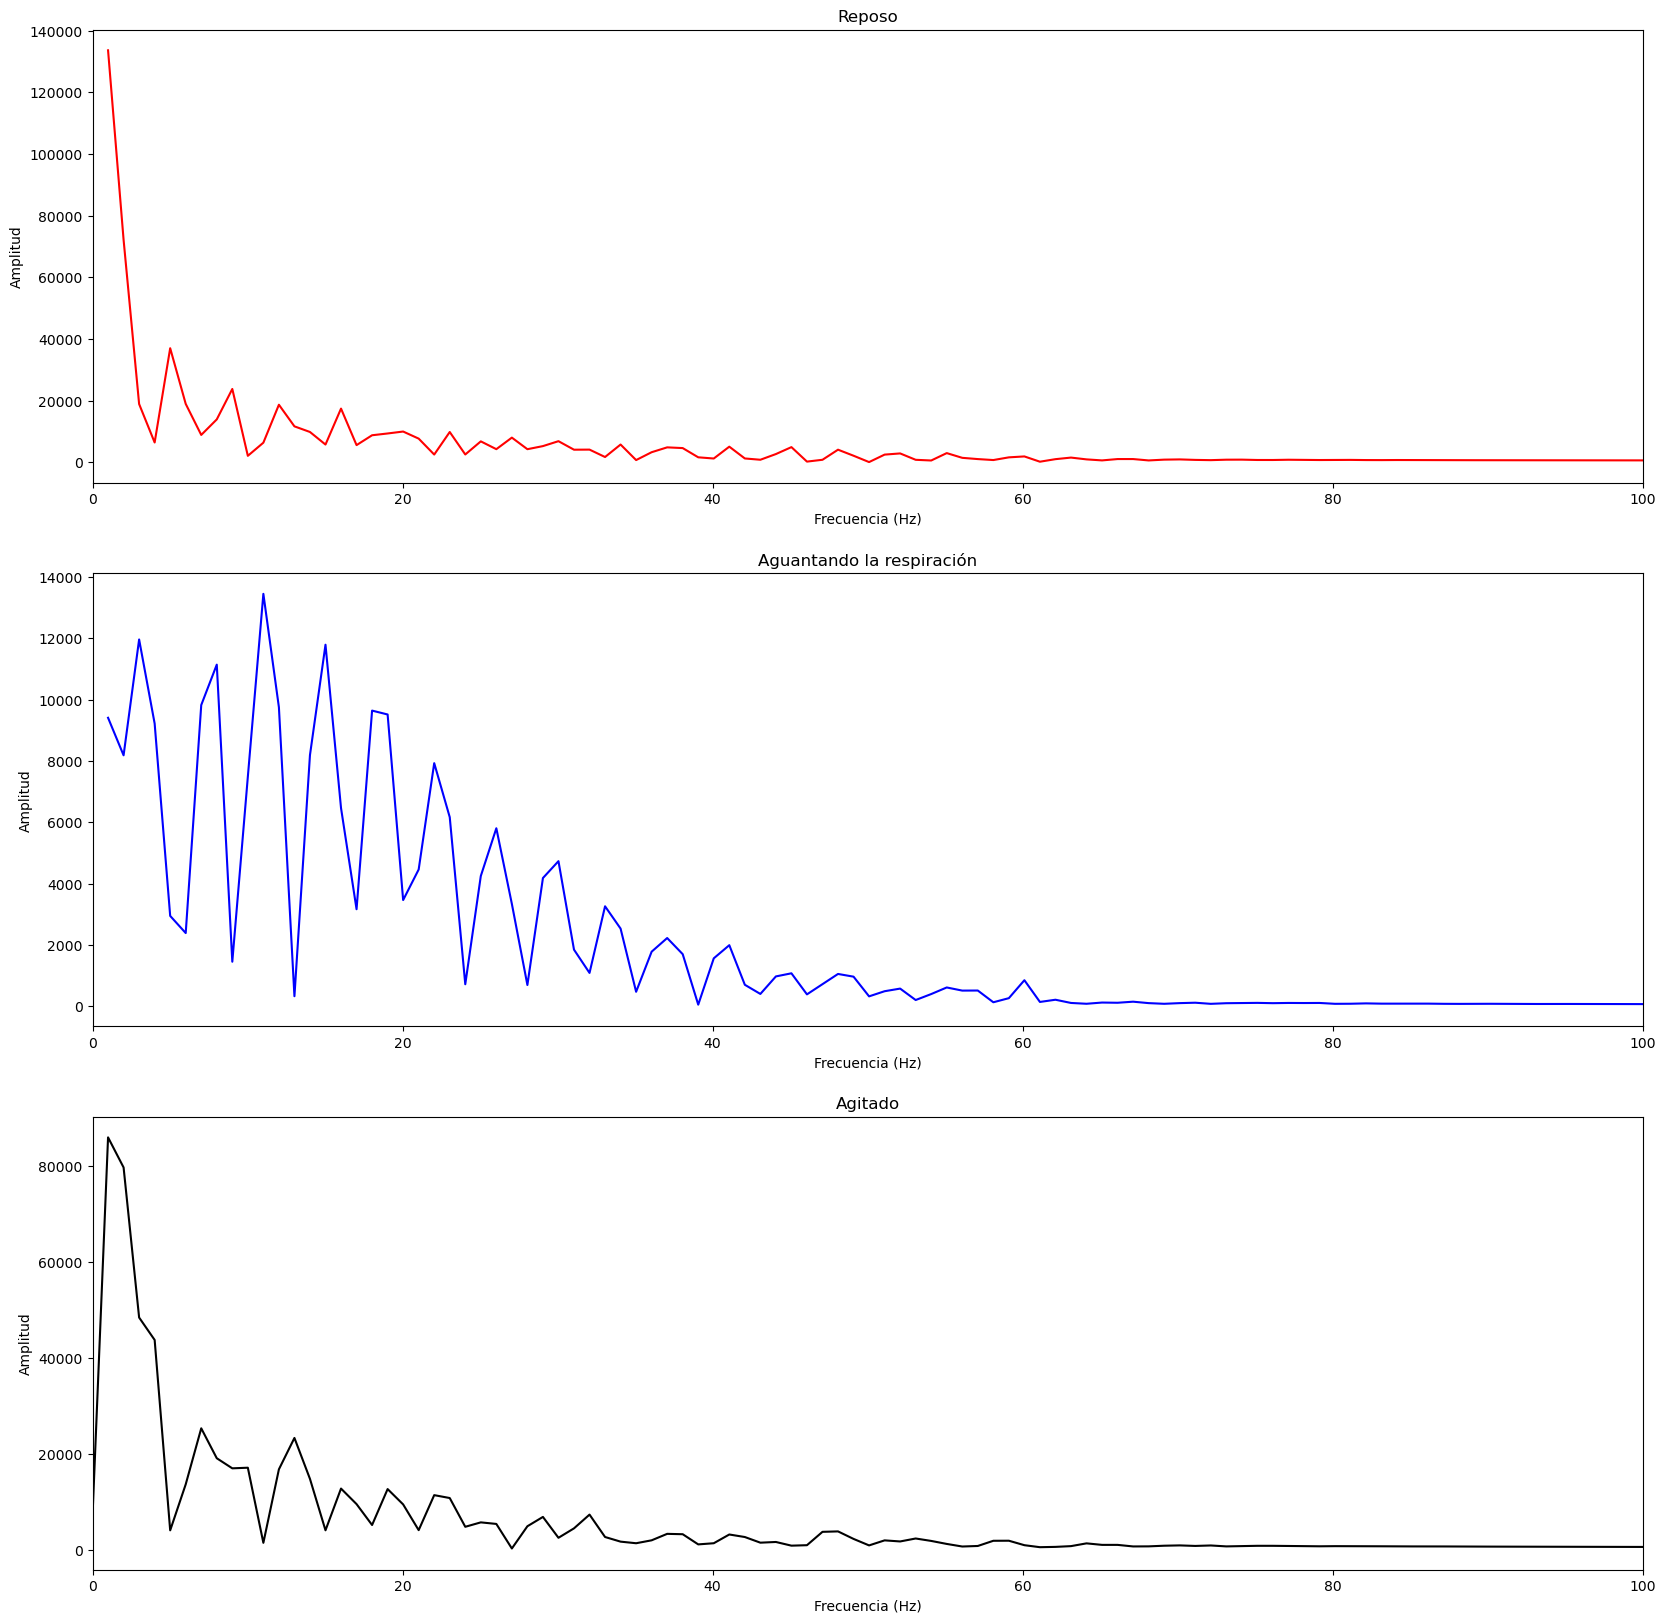

In [41]:
N=len(n)

SAMP1 = np.fft.fft(data_basal_filt)
SAMP1 = SAMP1 [0:N//2]

SAMP2 = np.fft.fft(data_resp_filt)
SAMP2  = SAMP2 [0:N//2]

SAMP3 = np.fft.fft(data_ejer_filt)
SAMP3  = SAMP3 [0:N//2]

#f = n*Fs/(N-1) - Fs/2
f= np.linspace(0,Fs/2,N//2)
#f = np.fft.fftshift(f)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(f[1:], np.abs(SAMP1)[1:],'r'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Reposo")
plt.subplot(3, 1, 2);plt.plot(f[1:], np.abs(SAMP2)[1:], 'b'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(f, np.abs(SAMP3), 'k');plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Agitado")

## 4. Creación de filtro - FIR: Hamming

C:\Users\mauri\AppData\Local\Temp\ipykernel_10160\3023020202.py:14: RuntimeWarning: divide by zero encountered in log10
  h_freq_db = 20 * np.log10(abs(h_freq))          #Rango - decibelio


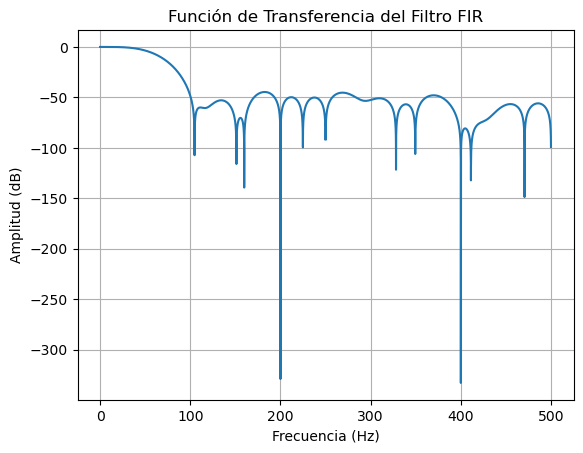

In [42]:
# Parámetros de nuestro filtro
##longitud de la ventana
M = 40

##frecuencia de corte en Hz (Menor que 60Hz)
Fc = 58

#Filtro FIR
w = signal.firwin(numtaps=M, cutoff=Fc, window='hamming', fs=Fs)
w = np.round(w,3)
w_freq, h_freq = signal.freqz(w, worN=8000)

# Convierte a dB y escala la frecuencia a Hz
h_freq_db = 20 * np.log10(abs(h_freq))          #Rango - decibelio
w_freq_hz = w_freq * Fs / (2 * np.pi)           #Dominio - frecuencia

# Plot - función de transferencia
plt.figure()
plt.plot(w_freq_hz, h_freq_db)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.title('Función de Transferencia del Filtro FIR')
plt.grid(True)
plt.show()

## 4.a Filtramos la señales con el filtro FIR creado

Text(0.5, 1.0, 'Agitado')

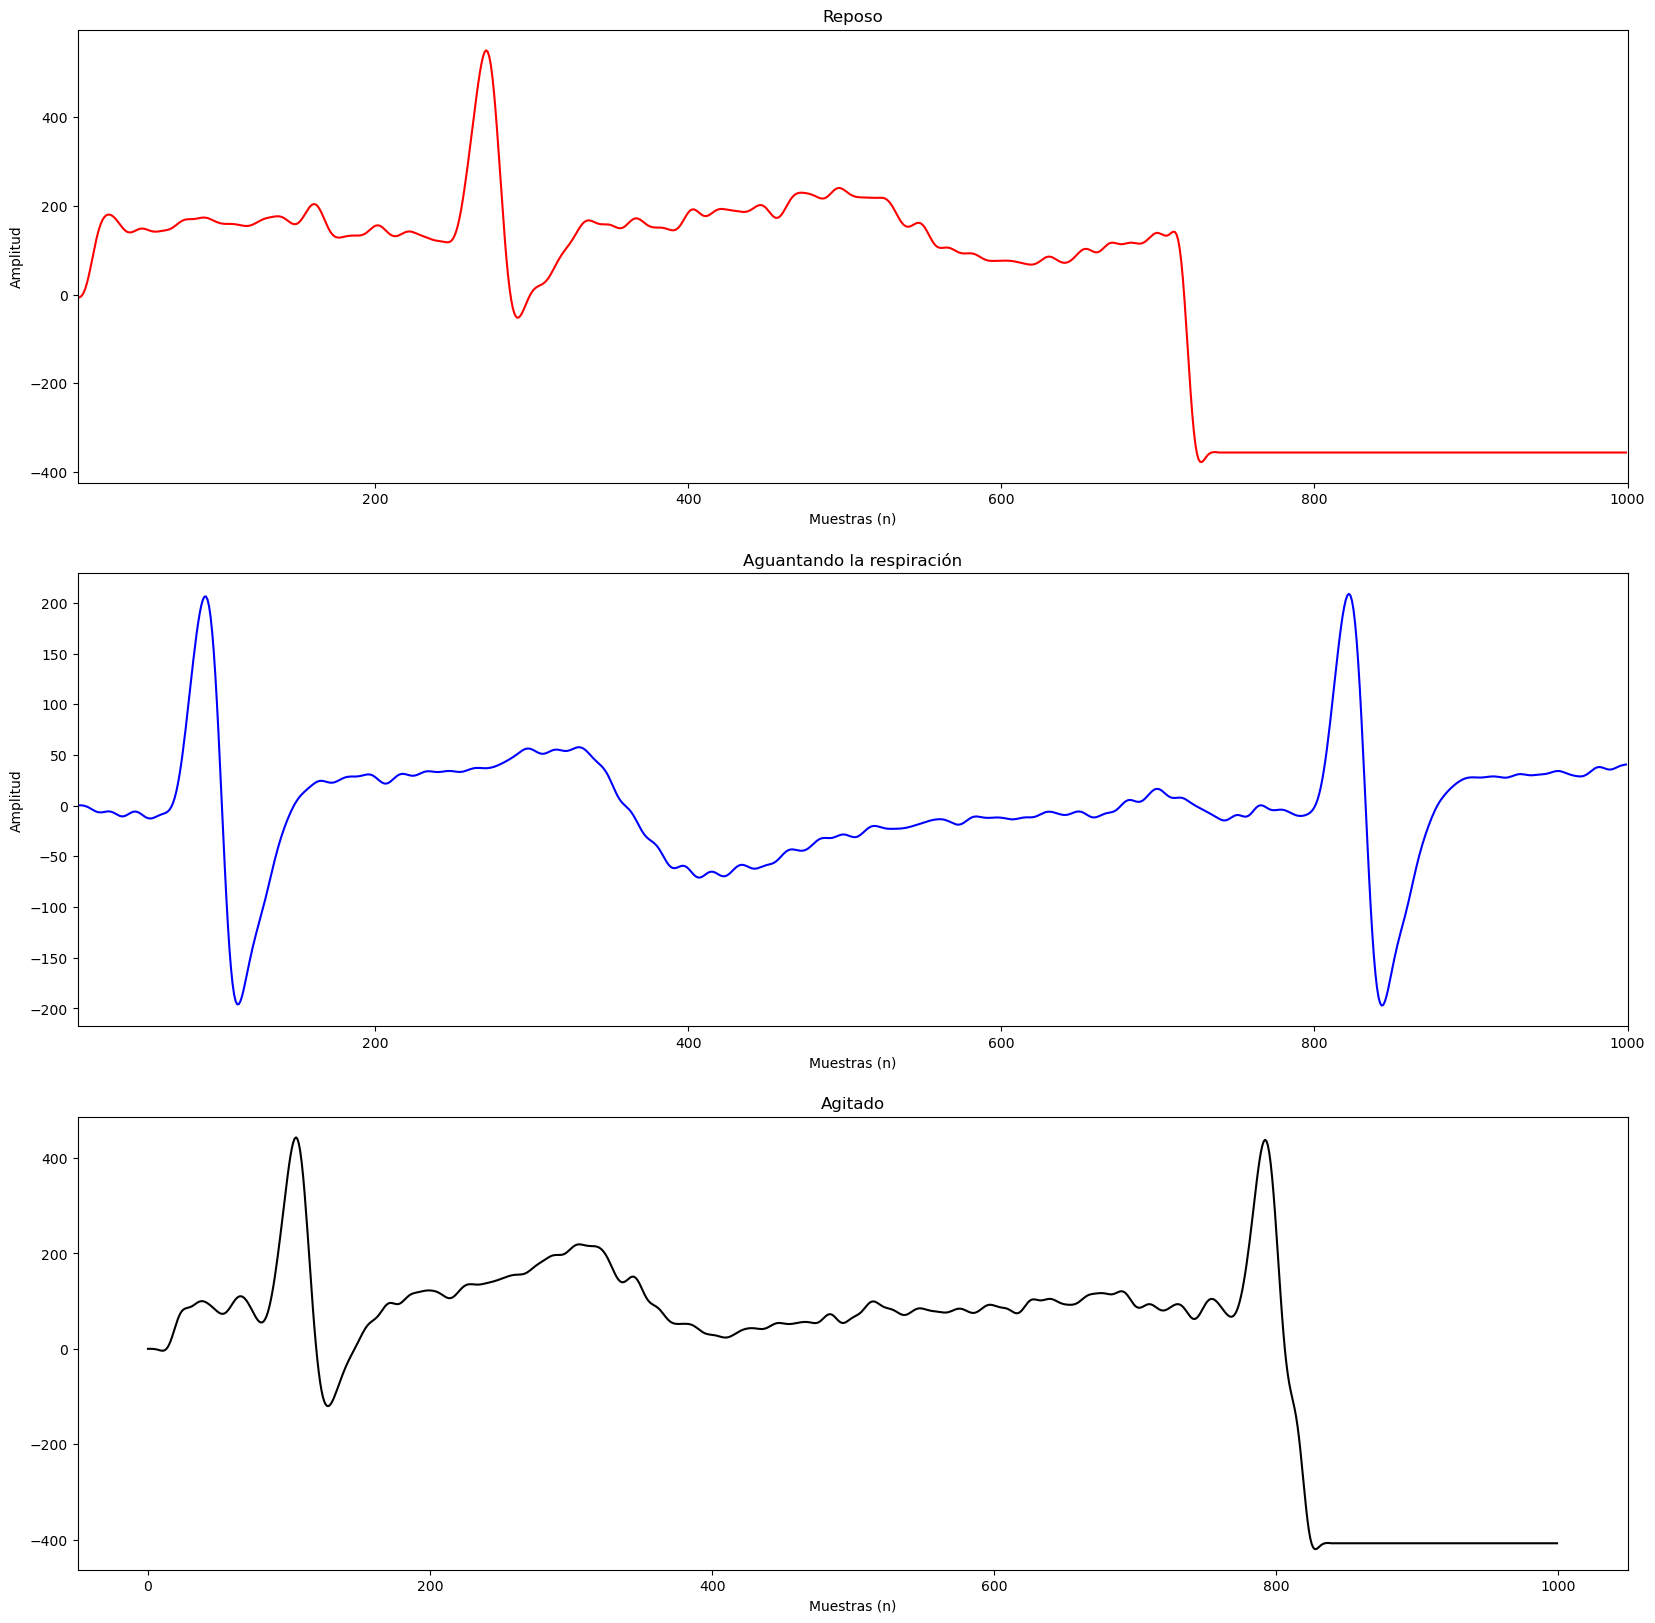

In [43]:
bd, ad = signal.bilinear(b,a,Fs)
data_basal_filt_fir = signal.lfilter(w, np.array(1),data_basal)
data_resp_filt_fir = signal.lfilter(w,np.array(1), data_resp) 
data_ejer_filt_fir = signal.lfilter(w,np.array(1), data_ejer)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(data_basal_filt_fir,'r'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud");plt.xlim(10,1000)
plt.title("Reposo")
plt.subplot(3, 1, 2);plt.plot(data_resp_filt_fir, 'b'); plt.xlabel("Muestras (n)"); plt.ylabel("Amplitud");plt.xlim(10,1000)
plt.title("Aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(data_ejer_filt_fir, 'k'); plt.xlabel( 'Muestras (n)')
plt.title("Agitado")

## 5. Comparamos las señales: Original, Filtro IIR y Filtro FIR

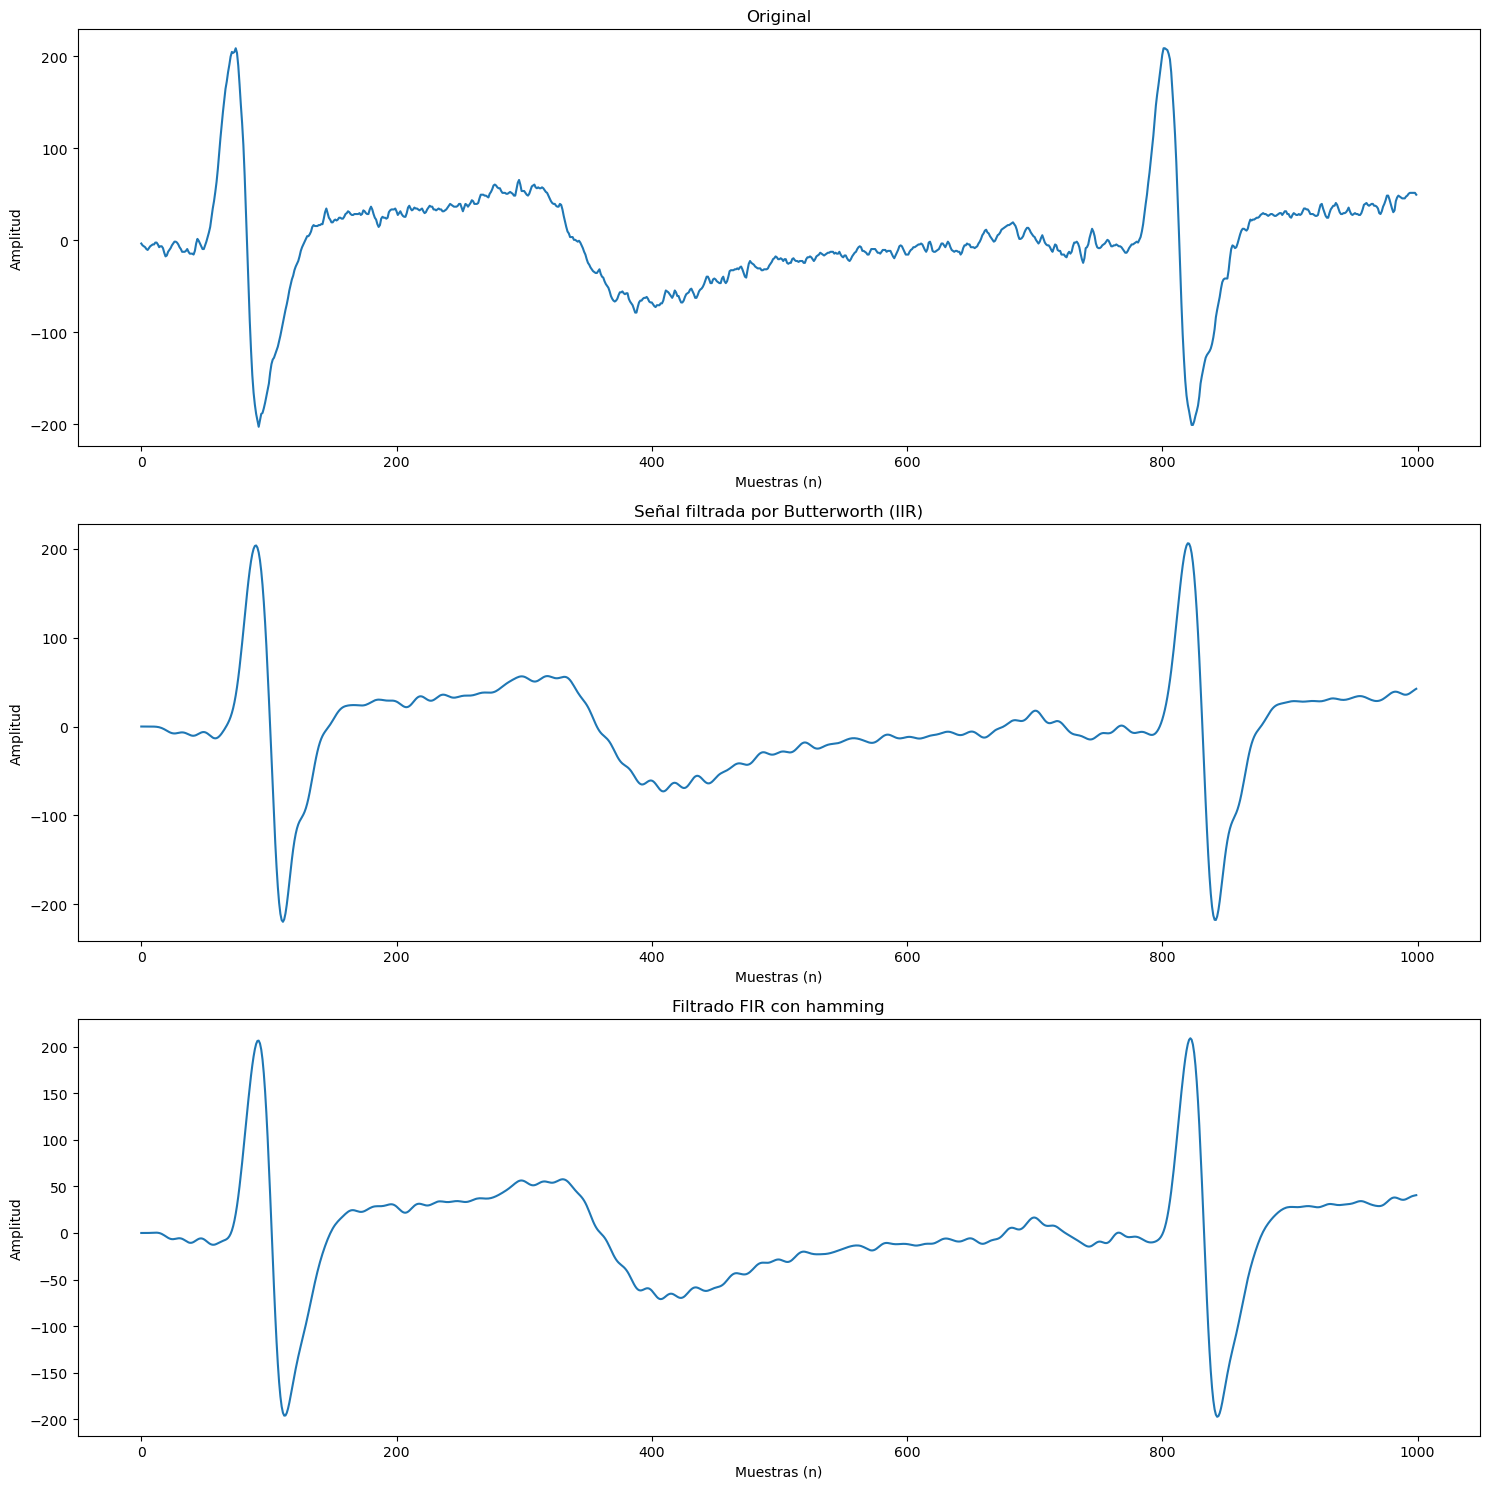

In [44]:
# Señal de estado respiración

plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(data_resp);plt.title("Original")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 1,2)
plt.title("Señal filtrada por Butterworth (IIR)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(data_resp_filt)
plt.subplot(3, 1, 3)
plt.plot(data_resp_filt_fir);plt.title("Filtrado FIR con hamming")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.tight_layout()

## 6. CUADRO COMPARATIVO DE LAS SEÑALES FILTRADAS Y ANALIZADAS

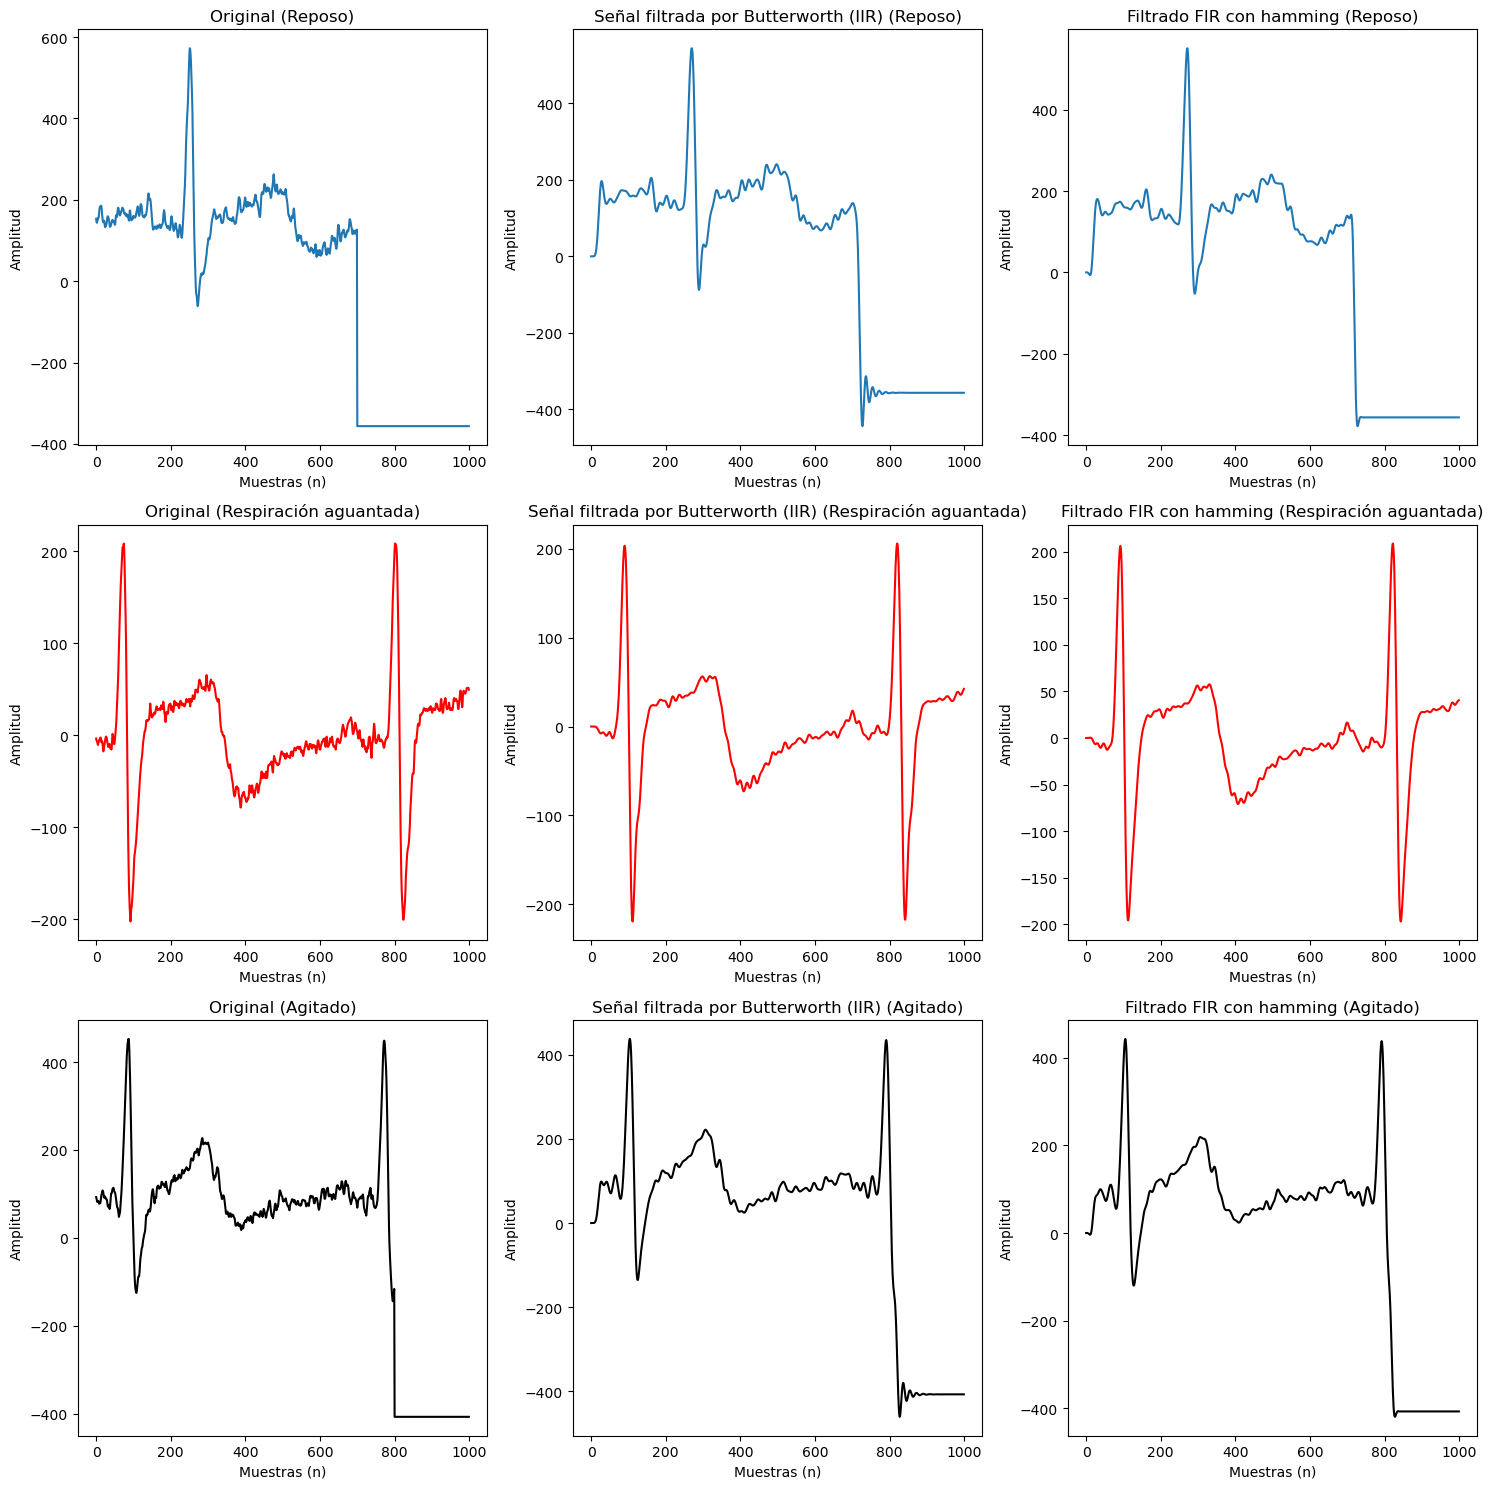

In [45]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.plot(data_basal);plt.title("Original (Reposo)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,2)
plt.title("Señal filtrada por Butterworth (IIR) (Reposo)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(data_basal_filt)
plt.subplot(3, 3, 3)
plt.plot(data_basal_filt_fir);plt.title("Filtrado FIR con hamming (Reposo)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3, 4)
plt.plot(data_resp,'r');plt.title("Original (Respiración aguantada)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,5)
plt.title("Señal filtrada por Butterworth (IIR) (Respiración aguantada)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(data_resp_filt,'r')
plt.subplot(3, 3, 6)
plt.plot(data_resp_filt_fir,'r');plt.title("Filtrado FIR con hamming (Respiración aguantada)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3, 7)
plt.plot(data_ejer,'k');plt.title("Original (Agitado)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,8)
plt.title("Señal filtrada por Butterworth (IIR) (Agitado)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(data_ejer_filt,'k')
plt.subplot(3, 3, 9)
plt.plot(data_ejer_filt_fir,'k');plt.title("Filtrado FIR con hamming (Agitado)")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
fig = plt.gcf()
fig.set_facecolor('white')
plt.tight_layout()

## GUARDAMOS LAS SEÑALES FILTRADAS CON EL FILTRO HAMMING

In [46]:
with np.load('dataset.npz') as data:
    ecg = {key: data[key] for key in data.keys()}
data = ecg['base']

filtered_data = np.zeros(data.shape)

for i, row in enumerate(data):
    offset = np.mean(row)
    centered_row = row - offset
    new_row = signal.lfilter(bd,ad, centered_row) + offset
    filtered_data[i] = new_row

filtered_data = filtered_data.round(2)
ecg['base'] = filtered_data
print("New filtered dataset")
print(ecg)
np.savez('dataset_filt_fir.npz', **ecg)

New filtered dataset
{'base': array([[ 3.5618e+02,  3.5618e+02,  3.5618e+02, ..., -0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 3.5524e+02,  3.5524e+02,  3.5524e+02, ..., -0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 3.5645e+02,  3.5645e+02,  3.5645e+02, ..., -0.0000e+00,
         0.0000e+00,  0.0000e+00],
       ...,
       [ 4.0845e+02,  4.0845e+02,  4.0845e+02, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 4.0250e+02,  4.0250e+02,  4.0250e+02, ...,  1.0000e-02,
         0.0000e+00,  0.0000e+00],
       [ 4.1612e+02,  4.1612e+02,  4.1612e+02, ...,  1.0000e-02,
         0.0000e+00,  0.0000e+00]]), 'target': array([0, 0, 0, ..., 2, 2, 2])}
